In [ ]:
# algorithm Training

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import random

In [2]:
data=pd.read_csv('../Dataset/exercise.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'exercise.csv'

In [90]:
data["BMR"].max()

1880

In [91]:
data["BMR"].min()

1073

In [92]:
X=data["BMR"].to_numpy()
X=X.reshape(-1,1)

In [93]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [7]:
kmeans.labels_

array([2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2,
       1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 0], dtype=int32)

In [94]:
val=1390
val=pd.Series([val])
val=val.to_numpy()
val=val.reshape(-1,1)
kmeans.predict(val)

array([1], dtype=int32)

In [10]:
kmeans.predict(val)

array([0], dtype=int32)

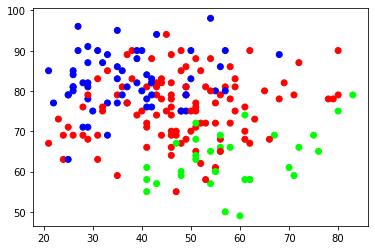

In [95]:
plt.scatter(data["Age"],data["Weight"],c=kmeans.labels_,cmap='brg')

In [ ]:
1073-1388 = 2, 1606-1880 =0, 1389-1605=1

In [ ]:
# Algorithm testing

In [96]:
meal=pd.read_csv('meal.csv')

In [97]:
bmr=1200
typei="Type1"
# breakfast_value=bmr*0.4
# lunch_value=bmr*0.3
# dinner_value=bmr*0.3

In [98]:
cluster0_lower=1606
cluster0_higher=1880
cluster1_lower=1389
cluster1_higher=1605
cluster2_lower=1073
cluster2_higher=1388

In [99]:
val=pd.Series([bmr])
val=val.to_numpy()
val=val.reshape(-1,1)
clu=kmeans.predict(val)[0]
if clu==0:
    cluster0_lower_breakfast=cluster0_lower*0.4
    cluster0_higher_breakfast=cluster0_higher*0.4
    cluster0_lower_lunch=cluster0_lower*0.3
    cluster0_higher_lunch=cluster0_higher*0.3
    cluster0_lower_dinner=cluster0_lower*0.3
    cluster0_higher_dinner=cluster0_higher*0.3
if clu==1:
    cluster0_lower_breakfast=cluster1_lower*0.4
    cluster0_higher_breakfast=cluster1_higher*0.4
    cluster0_lower_lunch=cluster1_lower*0.3
    cluster0_higher_lunch=cluster1_higher*0.3
    cluster0_lower_dinner=cluster1_lower*0.3
    cluster0_higher_dinner=cluster1_higher*0.3
if clu==2:
    cluster0_lower_breakfast=cluster2_lower*0.4
    cluster0_higher_breakfast=cluster2_higher*0.4
    cluster0_lower_lunch=cluster2_lower*0.3
    cluster0_higher_lunch=cluster2_higher*0.3
    cluster0_lower_dinner=cluster2_lower*0.3
    cluster0_higher_dinner=cluster2_higher*0.3
    

In [100]:
Breakfast=[]
calories_Breakfast=[]

Lunch=[]
calories_Lunch=[]

Dinner=[]
calories_Dinner=[]


for i,(j,k) in enumerate(zip(meal["Breakfast"],meal[typei])):
    if j==1 and k==1:
        Breakfast.append(meal["Meals"][i])
        calories_Breakfast.append(meal["Cal/gm"][i])

for i,(j,k) in enumerate(zip(meal["Lunch"],meal[typei])):
    if j==1 and k==1:
        Lunch.append(meal["Meals"][i])
        calories_Lunch.append(meal["Cal/gm"][i])

for i,(j,k) in enumerate(zip(meal["Dinner"],meal[typei])):
    if j==1 and k==1:
        Dinner.append(meal["Meals"][i])
        calories_Dinner.append(meal["Cal/gm"][i])


In [101]:
food_breakfast=list(itertools.combinations(calories_Breakfast,3))
count=0
all_food_breakfast=[]
for i in food_breakfast:
    if sum(i)>=cluster0_lower_breakfast and sum(i)<=cluster0_higher_breakfast:
        li=[]
        count+=1
        for j in i:
            ind=calories_Breakfast.index(j)
            li.append(Breakfast[ind])
        
        all_food_breakfast.append(li)
print(count)

998


In [102]:
food_lunch=list(itertools.combinations(calories_Lunch,3))
count=0
all_food_lunch=[]
for i in food_lunch:
    if sum(i)>=cluster0_lower_lunch and sum(i)<=cluster0_higher_lunch:
        li=[]
        count+=1
        for j in i:
            ind=calories_Lunch.index(j)
            li.append(Lunch[ind])
        
        all_food_lunch.append(li)
print(count)

497


In [106]:
food_dinner=list(itertools.combinations(calories_Dinner,3))
count=0
all_food_dinner=[]
for i in food_dinner:
    if sum(i)>=cluster0_lower_dinner and sum(i)<=cluster0_higher_dinner:
        li=[]
        count+=1
        for j in i:
            ind=calories_Dinner.index(j)
            li.append(Dinner[ind])
        
        all_food_dinner.append(li)


In [ ]:
# Recommending food

In [122]:

breaki=[]
lunchi=[]
dinneri=[]
# for i,j,k in zip(all_food_breakfast,all_food_lunch,all_food_dinner):

for i in all_food_breakfast:
    cal=0
    for food in i:
        ind=Breakfast.index(food)
        cal+=calories_Breakfast[ind]
    if cal<bmr*0.4:
        breaki.append(i)
    
for j in all_food_lunch:
    cal=0
    for food in j:
        ind=Lunch.index(food)
        cal+=calories_Lunch[ind]
    if cal<bmr*0.3:
        lunchi.append(j)
        
for k in all_food_dinner:
    cal=0
    for food in k:
        ind=Dinner.index(food)
        cal+=calories_Dinner[ind]
    if cal<(bmr*0.3):
        dinneri.append(k)


inte=random.randrange(0, len(lunchi))
b=breaki[random.randrange(0, len(breaki))]
l=lunchi[inte]
d=dinneri[random.randrange(0, len(dinneri))]
cal=0

for i,j,k in zip(b,l,d):
    
    ind=Breakfast.index(i)
    cal+=calories_Breakfast[ind]
        
    
    ind=Lunch.index(j)
    cal+=calories_Lunch[ind]
        
    
    ind=Dinner.index(k)
    cal+=calories_Dinner[ind]
print(b,"Breakfast",l,"Lunch",d,"Dinner",cal)

['Green Tea', 'Egg sandwich', 'Oats idli with coriander chutney'] Breakfast ['Broccolli', 'Humus with maze tortillas', 'Curried chicken salad with apples'] Lunch ['Flax Crackers', 'Chocolate fudge', 'Marinated turkey breast'] Dinner 1170.6


['Whole wheat bread',
 'Oats',
 'Raw Almonds',
 'Avacados',
 'Green Tea',
 'Walnuts',
 'Spinach Salad',
 'Dark Chocolate',
 'Cherries',
 'Kiwi',
 'Orange',
 'Nectarines',
 '½ cup cottage cheese with 1 fruit',
 'Plain Greek yogurt with added nuts or berries',
 ' Corn tortilla with scrambled egg whites',
 'Blueberry spinach smoothie',
 'Overnight oat meal',
 'Nut butter and fruit',
 'Egg sandwich',
 'Sweet potato and chicken sausage hash',
 'Veagetable omlet',
 'Savory Oat meal',
 'Tacos',
 'Avocados toast',
 'Cottage cheese with fruit',
 'Whole grain french toast',
 'Oats idli with coriander chutney',
 'Sprout salad',
 'Moong dal chilla',
 'Spinach and cheese rolls']

In [58]:
# meal[typei]
typei

'Type1'